# COMP377: AI for Software Developers
## Assignment 4: Convolutional Neural Networks
### Exercise 1

Name: Wenjie Zhou

Student ID: 301337168

Date: November 21, 2024

File Name: WenjieZhou_COMP377Lab4_Ex1

### Instructions

1.  Complete the code in the cells provided according to the instructions given in the comments.
2.  Ensure that your code runs without errors.
3.  Submit your completed notebook via eCentennial.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.callbacks import EarlyStopping
import random
import struct

### Part 1: Data Loading

In [2]:
## Part 1: Data Loading ##

# Functions to load MNIST dataset files
def load_mnist_images(filepath):
    with open(filepath, 'rb') as f:
        _ = struct.unpack('>IIII', f.read(16))
        images = np.fromfile(f, dtype=np.uint8)
        images = images.reshape(-1, 28, 28, 1)
        return images / 255.0  # Normalize pixel values to [0, 1]

def load_mnist_labels(filepath):
    with open(filepath, 'rb') as f:
        _ = struct.unpack('>II', f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
        return labels

# Define file paths for the dataset files
training_images_filepath = './MNIST/train-images-idx3-ubyte'
training_labels_filepath = './MNIST/train-labels-idx1-ubyte'
test_images_filepath = './MNIST/t10k-images-idx3-ubyte'
test_labels_filepath = './MNIST/t10k-labels-idx1-ubyte'

# Load the dataset files
X_train = load_mnist_images(training_images_filepath)
y_train = load_mnist_labels(training_labels_filepath)
X_test = load_mnist_images(test_images_filepath)
y_test = load_mnist_labels(test_labels_filepath)

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### Part 2: Data Preprocessing

In [3]:
## Part 2: Data Pre-processing ##

# Convert labels to one-hot encoding format
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

### Part 3: Create and Train Model

In [4]:
## Part 3: Model Training ###

# Define CNN model with 1 Convolutional Layer, 1 Average Pooling Layer, 1 Flatten Layer, 1 Dense Layer, and 1 Output Layer
# Use ReLU activation for Convolutional and Dense Layers, Softmax activation for Output Layer
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.AveragePooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Create the model
model = build_model()

# Compile the model with SGD optimizer, categorical crossentropy loss, and accuracy metric
# Use learning rate of 0.01 and momentum of 0.9
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# Define EarlyStopping callback with patience of 5
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Train the model and capture the training history with early stopping
# Use batch size of 64, 30 epochs, and 10% validation split
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/30


c:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8100 - loss: 0.6641 - val_accuracy: 0.9582 - val_loss: 0.1381
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9562 - loss: 0.1469 - val_accuracy: 0.9672 - val_loss: 0.1119
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9672 - loss: 0.1069 - val_accuracy: 0.9710 - val_loss: 0.0948
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9735 - loss: 0.0867 - val_accuracy: 0.9717 - val_loss: 0.0934
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9773 - loss: 0.0741 - val_accuracy: 0.9753 - val_loss: 0.0851
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9814 - loss: 0.0621 - val_accuracy: 0.9777 - val_loss: 0.0816
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9837 - loss: 0.0530 - val_accuracy: 0.9773 - val_loss: 0.0790
Epoch 8/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9855 - loss: 0.0460 - val_accuracy: 0.9763 - val_

### Part 4: Test Model

In [5]:
### Part 4: Model Evaluation ###

# Make predictions on the test set
y_pred_raw = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_raw, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### Part 5: Calculate Accuracy & Accuracy

In [6]:
### Part 5: Model Accuracy ###

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_raw, multi_class='ovr')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
ROC AUC: 1.00


### Visualization and Display (Optional)

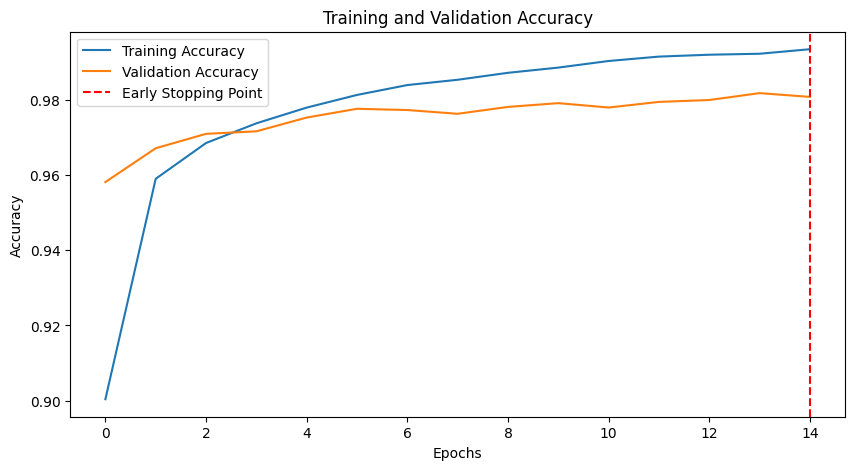

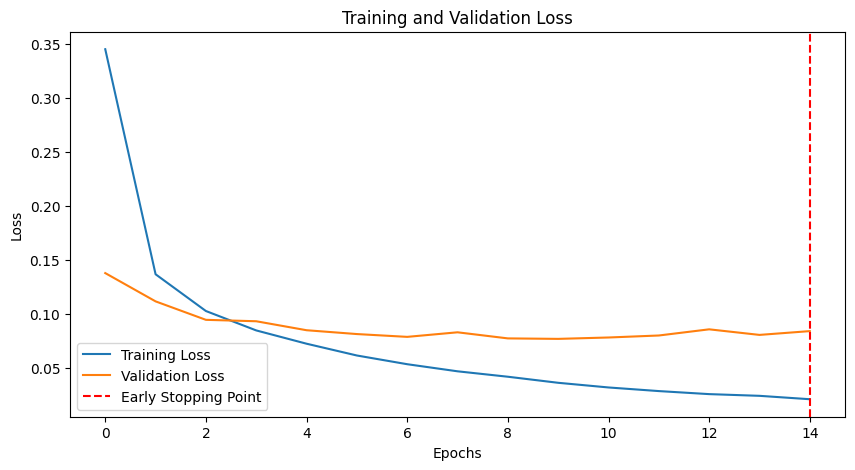

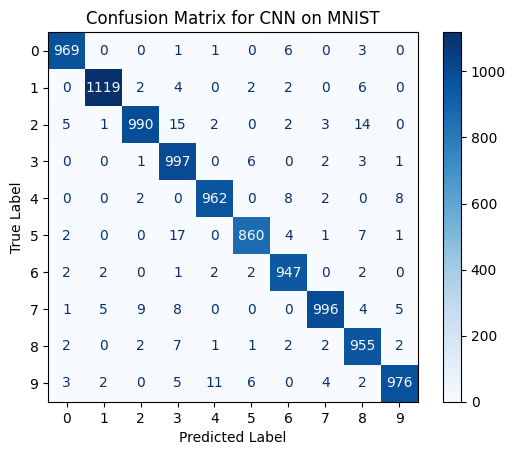

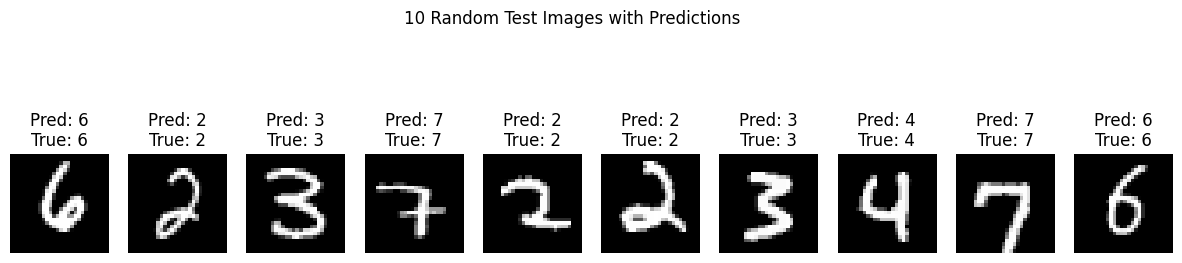

In [7]:
### Visualization & Display ###

## Print Results to the Screen ###

# Learning Curves
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axvline(early_stopping.stopped_epoch, color='r', linestyle='--', label='Early Stopping Point')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axvline(early_stopping.stopped_epoch, color='r', linestyle='--', label='Early Stopping Point')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion Matrix
# Display performance of the model in terms of true positives, false positives, true negatives, and false negatives.
cm = confusion_matrix(y_true_labels, y_pred_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for CNN on MNIST')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Sample Predictions
# Display 10 random test images with their true and predicted labels
num_samples = 10
sample_indices = np.random.choice(X_test.shape[0], num_samples, replace=False)
plt.figure(figsize=(15, 4))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"Pred: {y_pred_labels[idx]}\nTrue: {y_true_labels[idx]}")
plt.suptitle('10 Random Test Images with Predictions')
plt.show()

### Summary and Conclusions

CNN
- Accuracy: 0.98
- Precision: 0.98
- Recall: 0.98
- F1 Score: 0.98
- ROC AUC: 1.00

The CNN model demonstrates strong performance across all evaluation metrics, achieving an accuracy, precision, recall, and F1 score of 0.98, which indicates that it is correctly classifying 98% of the digits in the MNIST dataset. The ROC AUC score of 1.00 further suggests that the model has excellent discrimination ability, meaning it perfectly distinguishes between different classes in terms of probabilities. This indicates that the model is performing at a very high level, with minimal misclassification.

Although the model performs exceptionally well, there are still potential improvements that could be made. For instance, experimenting with deeper architectures, adding more convolutional layers, or using different pooling strategies like max pooling might enhance the model's ability to capture more complex features. Additionally, tuning hyperparameters such as learning rate, batch size, or optimizer type could lead to further improvements. Regularization techniques like dropout could also be applied to prevent overfitting, especially if the model is trained on larger datasets. Lastly, using techniques such as data augmentation might improve generalization when dealing with more diverse or noisy data.

#### Comparison

SVM
- Accuracy: 0.9293
- Precision: 0.9294291952604579
- Recall: 0.9293

The SVM model achieves an accuracy of 0.9293, which is slightly lower than the CNN model's 0.98. While the precision and recall scores for the SVM are also around 0.93, these results still fall short when compared to the CNN model's performance across the same metrics. The SVM model appears to be less effective in distinguishing between the MNIST digits, as evidenced by its lower accuracy and slightly weaker precision and recall. This could be due to the SVM's reliance on manually selected features and its inability to fully exploit the spatial relationships in the pixel data, which is where convolutional layers in the CNN excel. Overall, while the SVM model provides reasonable performance, the CNN is significantly better suited for this image classification task due to its ability to automatically learn hierarchical features from the data.